In [1]:
import numpy as np
from kgof import density
import matplotlib.pyplot as plt

from reltest.mctest import MCTestPSI, MCTestCorr
from reltest.kernel import KGauss
from reltest.mmd import MMD_U

import pandas as pd
import collections
import os
import string
from matplotlib.transforms import Bbox
import itertools
import matplotlib
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 22
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
#matplotlib.use('pgf')
#matplotlib.rc('pgf', texsystem='lualatex')  # from running latex -v
#preamble = matplotlib.rcParams.setdefault('pgf.preamble', [])
#preamble.append(r'\usepackage{color}')

In [2]:
markers=['o','D','*','x']
pretty_keys={'psi':r"PSI",
             'split0.25':r"Mult S:25% T:75%",
            'split0.5':r"Mult S:50% T:50%",
            'split0.75':r"Mult S:75% T:25%"}

In [3]:
lines = []

Text(0, 0.5, 'TPR')

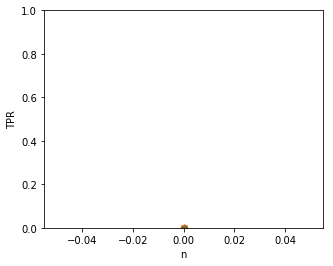

In [5]:
fig, ax = plt.subplots(figsize=(5,4))
desired_dim = [0,1]
reverse=[False,True]
#res = dfs[0].to_dict()
#x_lin = [float(item) for item in list(res.keys())]
#y_lins = collections.defaultdict(list)
# for rotation, results in res.items():
#     for test, result in results.items():
#         y_lins[test].append(result)
for marker in markers:
    line, = ax.plot([0], [0], marker=marker)
    lines.append(line)
ax.set_xlabel("n")
ax.set_ylim(0,1)
ax.set_ylabel("TPR")
#ax.set_xlim(x_lin[0],x_lin[-1])
#fig.savefig("../docs/graphs/power/n_varies.pdf",bbox_inches='tight')

In [28]:
fig = plt.figure()
fig.legend(lines,list(pretty_keys.values()), loc='center', frameon=False,ncol=4)
fig.savefig("../docs/graphs/power/hlegend.pdf",bbox_inches='tight')
fig = plt.figure()
fig.legend(lines,list(pretty_keys.values()), loc='center', frameon=False,ncol=1)
fig.savefig("../docs/graphs/power/vlegend.pdf",bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

NameError: name 'dfs' is not defined

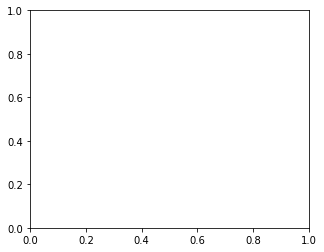

In [7]:
fig, ax = plt.subplots(figsize=(5,4))
desired_dim = [0,1]
res = dfs[1].to_dict()
x_lin = [float(item)*-1 for item in list(res.keys())]
y_lins = collections.defaultdict(list)
for rotation, results in res.items():
    for test, result in results.items():
        y_lins[test].append(result)
for j,(key, value) in enumerate(y_lins.items()):
    ax.plot(x_lin,[res['av_rej'][1]for res in value],label=pretty_keys[key],marker=markers[j],linewidth=2.0)
ax.set_xlabel("Rotation (rad)")
ax.set_ylim(0,1)
ax.set_ylabel("TPR")
ax.set_xlim(x_lin[0],x_lin[-1])
fig.savefig("../docs/graphs/power/rotation.pdf",bbox_inches='tight')

NameError: name 'power' is not defined

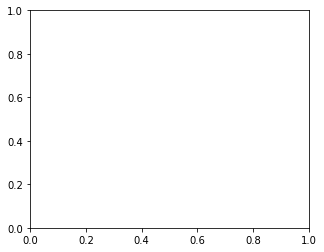

In [8]:
fig, ax = plt.subplots(figsize=(5,4))
x_lin = np.linspace(-2,2,num=1000)[:,np.newaxis]
power.sample_tilt_gauss(10,3*np.pi/8,10,return_density=False,plot=(x_lin*2,ax))
ax.annotate(r'$\textcolor{red}{P_2}$', xy=(-1.5,3.2),transform=ax.transAxes)
ax.annotate(r'$\textcolor{blue}{P_1}$', xy=(2.,3.),transform=ax.transAxes)
ax.annotate(r'$\textcolor{black}{R}$', xy=(3.2,0.65),transform=ax.transAxes)
fig.savefig("../docs/graphs/power/rotation_vis.pdf",bbox_inches='tight')

NameError: name 'power' is not defined

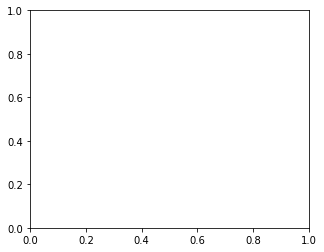

In [9]:
fig, ax = plt.subplots(figsize=(5,4))
x_lin = np.linspace(-2,2,num=1000)[:,np.newaxis]
power.sample_mix_gauss(10,0.3,10,return_density=False,plot=(x_lin,ax))
ax.annotate(r'$\textcolor{red}{P_2}$', xy=(-0.6,0.85),transform=ax.transAxes)
ax.annotate(r'$\textcolor{blue}{P_1}$', xy=(0.85,0.425),transform=ax.transAxes)
ax.annotate(r'$\textcolor{black}{R}$', xy=(1.1,0.65),transform=ax.transAxes)
fig.savefig("../docs/graphs/power/mix_vis.pdf",bbox_inches='tight')

In [12]:
fig, axs = plt.subplots(1,len(dfs)+2,figsize=(25,5))
markers=['o','D','*','x']
pretty_keys={'psi':r"PSI",
             'split0.25':r"Mult S:25% T:75%",
            'split0.5':r"Mult S:50% T:50%",
            'split0.75':r"Mult S:75% T:25%"}
x_labels=["$n$", "Mixing Portion"]
desired_dim = [0,1]
reverse=[False,True]
for i,df in enumerate(dfs):
    res = df.to_dict()
    x_lin = [float(item) for item in list(res.keys())]
    y_lins = collections.defaultdict(list)
    for rotation, results in res.items():
        for test, result in results.items():
            y_lins[test].append(result)
    for j,(key, value) in enumerate(y_lins.items()):
        if reverse[i]:
            axs[i*2].set_xlim(np.max(x_lin), np.min(x_lin))
        axs[i*2].plot(x_lin,[res['av_rej'][desired_dim[i]]for res in value],label=pretty_keys[key],marker=markers[j],linewidth=2.0)
    axs[i*2].set_xlabel(x_labels[i])
    axs[i*2].set_ylim(0,1)
    #axs[i*2].set_xticks(x_lin)
    #fig.legend(bbox_to_anchor=(1., 1.25),ncol=4)
    
axs[0].legend(bbox_to_anchor=(3.75, 1.25),ncol=4)
axs[0].set_ylabel("TPR")
## Plot Densities
x_lin = np.linspace(-2,2,num=1000)[:,np.newaxis]
power.sample_mix_gauss(10,0.3,i,return_density=False,plot=(x_lin,axs[1]))
power.sample_tilt_gauss(10,3*np.pi/8,i,return_density=False,plot=(x_lin*2,axs[3]))
axs[1].set_xticks([], [])
axs[1].set_yticks([], [])
axs[3].set_xticks([], [])
axs[3].set_yticks([], [])
axs[3].annotate(r'$\textcolor{blue}{P_1}$', xy=(2.,2.5),transform=axs[3].transAxes)
axs[3].annotate(r'$\textcolor{red}{P_2}$', xy=(-1.5,3.25),transform=axs[3].transAxes)
axs[3].annotate(r'$\textcolor{black}{R}$', xy=(3.25,0),transform=axs[3].transAxes)
axs[1].annotate(r'$\textcolor{red}{P_2}$', xy=(-0.6,0.85),transform=axs[1].transAxes)
axs[1].annotate(r'$\textcolor{blue}{P_1}$', xy=(0.85,0.425),transform=axs[1].transAxes)
axs[1].annotate(r'$\textcolor{black}{R}$', xy=(1.1,0.65),transform=axs[1].transAxes)
# for i,ax in enumerate(axs):
#     ax.text(0.05, 0.9, string.ascii_uppercase[i], transform=ax.transAxes, 
#     size=20, weight='bold')
plt.show()
fig.savefig("../docs/graphs/power.pdf",bbox_inches=full_extent(axs[3]).transformed(fig.dpi_scale_trans.inverted()))

NameError: name 'dfs' is not defined

NameError: name 'power' is not defined

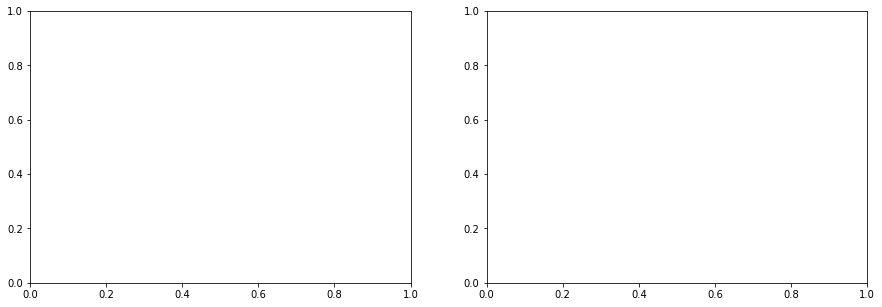

In [11]:
## Plot Densities
fig, axs = plt.subplots(1,2,figsize=(15,5))
x_lin = np.linspace(-2,2,num=1000)[:,np.newaxis]
power.sample_mix_gauss(10,0.25,i,return_density=False,plot=(x_lin,axs[0]))
power.sample_tilt_gauss(10,3*np.pi/8,i,return_density=False,plot=(x_lin*2,axs[1]))
axs[0].set_xticks([], [])
axs[0].set_yticks([], [])
axs[1].set_xticks([], [])
axs[1].set_yticks([], [])
plt.savefig("../docs/graphs/power_examples.pdf",bbox_inches='tight')